# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_20L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W15206-_9p12q_8L.bmp',
   'D:\\Users\\Chuan\\Documen

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_09
   Train: 
        193002-9p12q13_11L.bmp
        193002-9p12q13_12L.bmp
        193002-9p12q13_13L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_17L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_1L.bmp
        193002-9p12q13_24L.bmp
        193002-9p12q13_2L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_5L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_7L.bmp
        193002-9p12q13_8L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_12L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_14L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_19L.bmp
        W07391-9p12q_1L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_22L.bmp
        W07391-9p12q_2L.bmp
        W07391-9p12q_4L.bmp
        W07391

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

370

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [31]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
6/6 [==============================] - 8s 629ms/step - loss: 838.2579 - accuracy: 0.5351 - val_loss: 4.7351 - val_accuracy: 0.3968
Epoch 2/500
6/6 [==============================] - 1s 117ms/step - loss: 3.2238 - accuracy: 0.5216 - val_loss: 11.1676 - val_accuracy: 0.6032
Epoch 3/500
6/6 [==============================] - 1s 119ms/step - loss: 3.9460 - accuracy: 0.7135 - val_loss: 8.4019 - val_accuracy: 0.6032
Epoch 4/500
6/6 [==============================] - 1s 119ms/step - loss: 1.4655 - accuracy: 0.8649 - val_loss: 0.2179 - val_accuracy: 0.9206
Epoch 5/500
6/6 [==============================] - 1s 117ms/step - loss: 3.4047 - accuracy: 0.8568 - val_loss: 0.3633 - val_accuracy: 0.8095
Epoch 6/500
6/6 [==============================] - 1s 118ms/step - loss: 0.3180 - accuracy: 0.9135 - val_loss: 0.2026 - val_accuracy: 0.9365
Epoch 7/500
6/6 [==============================] - 1s 117ms/step - loss: 0.2317 - accuracy: 0.9081 - val_loss: 0.3647 - val_accuracy: 0.8254
Epoch 8/50

6/6 [==============================] - 1s 124ms/step - loss: 1.8349e-05 - accuracy: 1.0000 - val_loss: 0.8633 - val_accuracy: 0.9206
Epoch 58/500
6/6 [==============================] - 1s 125ms/step - loss: 1.7615e-05 - accuracy: 1.0000 - val_loss: 0.8656 - val_accuracy: 0.9206
Epoch 59/500
6/6 [==============================] - 1s 125ms/step - loss: 1.7039e-05 - accuracy: 1.0000 - val_loss: 0.8684 - val_accuracy: 0.9206
Epoch 60/500
6/6 [==============================] - 1s 126ms/step - loss: 1.6352e-05 - accuracy: 1.0000 - val_loss: 0.8706 - val_accuracy: 0.9206
Epoch 61/500
6/6 [==============================] - 1s 125ms/step - loss: 1.5814e-05 - accuracy: 1.0000 - val_loss: 0.8729 - val_accuracy: 0.9206
Epoch 62/500
6/6 [==============================] - 1s 124ms/step - loss: 1.5244e-05 - accuracy: 1.0000 - val_loss: 0.8756 - val_accuracy: 0.9206
Epoch 63/500
6/6 [==============================] - 1s 126ms/step - loss: 1.4730e-05 - accuracy: 1.0000 - val_loss: 0.8781 - val_accuracy

6/6 [==============================] - 1s 122ms/step - loss: 3.5794e-06 - accuracy: 1.0000 - val_loss: 0.9545 - val_accuracy: 0.9206
Epoch 114/500
6/6 [==============================] - 1s 120ms/step - loss: 3.5014e-06 - accuracy: 1.0000 - val_loss: 0.9556 - val_accuracy: 0.9206
Epoch 115/500
6/6 [==============================] - 1s 123ms/step - loss: 3.4231e-06 - accuracy: 1.0000 - val_loss: 0.9567 - val_accuracy: 0.9206
Epoch 116/500
6/6 [==============================] - 1s 122ms/step - loss: 3.3552e-06 - accuracy: 1.0000 - val_loss: 0.9576 - val_accuracy: 0.9206
Epoch 117/500
6/6 [==============================] - 1s 121ms/step - loss: 3.2872e-06 - accuracy: 1.0000 - val_loss: 0.9587 - val_accuracy: 0.9206
Epoch 118/500
6/6 [==============================] - 1s 121ms/step - loss: 3.2163e-06 - accuracy: 1.0000 - val_loss: 0.9595 - val_accuracy: 0.9206
Epoch 119/500
6/6 [==============================] - 1s 121ms/step - loss: 3.1454e-06 - accuracy: 1.0000 - val_loss: 0.9612 - val_ac

Epoch 169/500
6/6 [==============================] - 1s 126ms/step - loss: 9.9845e-07 - accuracy: 1.0000 - val_loss: 1.0282 - val_accuracy: 0.9206
Epoch 170/500
6/6 [==============================] - 1s 123ms/step - loss: 9.8105e-07 - accuracy: 1.0000 - val_loss: 1.0291 - val_accuracy: 0.9206
Epoch 171/500
6/6 [==============================] - 1s 122ms/step - loss: 9.6204e-07 - accuracy: 1.0000 - val_loss: 1.0299 - val_accuracy: 0.9206
Epoch 172/500
6/6 [==============================] - 1s 121ms/step - loss: 9.4497e-07 - accuracy: 1.0000 - val_loss: 1.0312 - val_accuracy: 0.9206
Epoch 173/500
6/6 [==============================] - 1s 119ms/step - loss: 9.2789e-07 - accuracy: 1.0000 - val_loss: 1.0321 - val_accuracy: 0.9206
Epoch 174/500
6/6 [==============================] - 1s 122ms/step - loss: 9.1339e-07 - accuracy: 1.0000 - val_loss: 1.0331 - val_accuracy: 0.9206
Epoch 175/500
6/6 [==============================] - 1s 119ms/step - loss: 8.9825e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 225/500
6/6 [==============================] - 1s 120ms/step - loss: 4.3463e-07 - accuracy: 1.0000 - val_loss: 1.0653 - val_accuracy: 0.9206
Epoch 226/500
6/6 [==============================] - 1s 121ms/step - loss: 4.2625e-07 - accuracy: 1.0000 - val_loss: 1.0662 - val_accuracy: 0.9206
Epoch 227/500
6/6 [==============================] - 1s 123ms/step - loss: 4.1916e-07 - accuracy: 1.0000 - val_loss: 1.0668 - val_accuracy: 0.9206
Epoch 228/500
6/6 [==============================] - 1s 121ms/step - loss: 4.1369e-07 - accuracy: 1.0000 - val_loss: 1.0672 - val_accuracy: 0.9206
Epoch 229/500
6/6 [==============================] - 1s 123ms/step - loss: 4.0757e-07 - accuracy: 1.0000 - val_loss: 1.0680 - val_accuracy: 0.9206
Epoch 230/500
6/6 [==============================] - 1s 124ms/step - loss: 4.0241e-07 - accuracy: 1.0000 - val_loss: 1.0691 - val_accuracy: 0.9206
Epoch 231/500
6/6 [==============================] - 1s 120ms/step - loss: 3.9564e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 281/500
6/6 [==============================] - 1s 124ms/step - loss: 1.8912e-07 - accuracy: 1.0000 - val_loss: 1.1182 - val_accuracy: 0.9206
Epoch 282/500
6/6 [==============================] - 1s 122ms/step - loss: 1.8558e-07 - accuracy: 1.0000 - val_loss: 1.1162 - val_accuracy: 0.9206
Epoch 283/500
6/6 [==============================] - 1s 123ms/step - loss: 1.8075e-07 - accuracy: 1.0000 - val_loss: 1.1224 - val_accuracy: 0.9206
Epoch 284/500
6/6 [==============================] - 1s 240ms/step - loss: 1.7914e-07 - accuracy: 1.0000 - val_loss: 1.1201 - val_accuracy: 0.9206
Epoch 285/500
6/6 [==============================] - 1s 126ms/step - loss: 1.7044e-07 - accuracy: 1.0000 - val_loss: 1.1265 - val_accuracy: 0.9206
Epoch 286/500
6/6 [==============================] - 1s 120ms/step - loss: 1.7334e-07 - accuracy: 1.0000 - val_loss: 1.1254 - val_accuracy: 0.9206
Epoch 287/500
6/6 [==============================] - 1s 122ms/step - loss: 1.6432e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 337/500
6/6 [==============================] - 1s 150ms/step - loss: 7.7003e-08 - accuracy: 1.0000 - val_loss: 1.1821 - val_accuracy: 0.9206
Epoch 338/500
6/6 [==============================] - 1s 133ms/step - loss: 7.8936e-08 - accuracy: 1.0000 - val_loss: 1.1751 - val_accuracy: 0.9206
Epoch 339/500
6/6 [==============================] - 1s 136ms/step - loss: 7.7325e-08 - accuracy: 1.0000 - val_loss: 1.1873 - val_accuracy: 0.9206
Epoch 340/500
6/6 [==============================] - 1s 135ms/step - loss: 7.5070e-08 - accuracy: 1.0000 - val_loss: 1.1826 - val_accuracy: 0.9206
Epoch 341/500
6/6 [==============================] - 1s 131ms/step - loss: 7.3781e-08 - accuracy: 1.0000 - val_loss: 1.1770 - val_accuracy: 0.9206
Epoch 342/500
6/6 [==============================] - 1s 134ms/step - loss: 7.4425e-08 - accuracy: 1.0000 - val_loss: 1.1856 - val_accuracy: 0.9206
Epoch 343/500
6/6 [==============================] - 1s 137ms/step - loss: 7.1526e-08 - accuracy: 1.0000 - val_loss: 1

Epoch 393/500
6/6 [==============================] - 1s 137ms/step - loss: 5.2839e-08 - accuracy: 1.0000 - val_loss: 1.1942 - val_accuracy: 0.9206
Epoch 394/500
6/6 [==============================] - 1s 140ms/step - loss: 4.8006e-08 - accuracy: 1.0000 - val_loss: 1.2184 - val_accuracy: 0.9206
Epoch 395/500
6/6 [==============================] - 1s 139ms/step - loss: 5.0583e-08 - accuracy: 1.0000 - val_loss: 1.1929 - val_accuracy: 0.9206
Epoch 396/500
6/6 [==============================] - 1s 136ms/step - loss: 5.0261e-08 - accuracy: 1.0000 - val_loss: 1.1988 - val_accuracy: 0.9206
Epoch 397/500
6/6 [==============================] - 1s 134ms/step - loss: 4.9617e-08 - accuracy: 1.0000 - val_loss: 1.2113 - val_accuracy: 0.9206
Epoch 398/500
6/6 [==============================] - 1s 137ms/step - loss: 4.7362e-08 - accuracy: 1.0000 - val_loss: 1.1995 - val_accuracy: 0.9206
Epoch 399/500
6/6 [==============================] - 1s 133ms/step - loss: 4.6073e-08 - accuracy: 1.0000 - val_loss: 1

Epoch 449/500
6/6 [==============================] - 1s 126ms/step - loss: 3.2541e-08 - accuracy: 1.0000 - val_loss: 1.2243 - val_accuracy: 0.9206
Epoch 450/500
6/6 [==============================] - 1s 121ms/step - loss: 3.2219e-08 - accuracy: 1.0000 - val_loss: 1.2161 - val_accuracy: 0.9206
Epoch 451/500
6/6 [==============================] - 1s 123ms/step - loss: 3.2541e-08 - accuracy: 1.0000 - val_loss: 1.2183 - val_accuracy: 0.9206
Epoch 452/500
6/6 [==============================] - 1s 126ms/step - loss: 3.2219e-08 - accuracy: 1.0000 - val_loss: 1.2291 - val_accuracy: 0.9206
Epoch 453/500
6/6 [==============================] - 1s 122ms/step - loss: 3.1897e-08 - accuracy: 1.0000 - val_loss: 1.2129 - val_accuracy: 0.9206
Epoch 454/500
6/6 [==============================] - 1s 127ms/step - loss: 3.4474e-08 - accuracy: 1.0000 - val_loss: 1.2282 - val_accuracy: 0.9206
Epoch 455/500
6/6 [==============================] - 1s 128ms/step - loss: 3.1897e-08 - accuracy: 1.0000 - val_loss: 1

### 3.2.7 Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [33]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 24932), started 20:51:28 ago. (Use '!kill 24932' to kill it.)

## 3.8 Save the Model

In [34]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_0\assets


## 3.9 Load the Model

In [35]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [36]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.921


In [37]:
len(X_test)

63

In [38]:
y_predict = model_reload.predict(X_test)

In [39]:
len(y_predict)

63

In [40]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [41]:
len(y_predict_filtered)

63

In [42]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [43]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [44]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [45]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [46]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [47]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
y_predict

array([[9.76126432e-01, 5.12033722e-08],
       [1.00000000e+00, 1.25864761e-11],
       [1.47422515e-02, 9.67322732e-04],
       [9.99999166e-01, 1.73908429e-10],
       [9.99617577e-01, 1.69427210e-07],
       [9.99533892e-01, 1.04911912e-07],
       [9.96803999e-01, 6.89776769e-08],
       [9.99998212e-01, 2.25349872e-09],
       [9.99999881e-01, 3.55360151e-11],
       [9.99999881e-01, 7.80545628e-11],
       [9.99998212e-01, 1.19980914e-09],
       [9.99871731e-01, 1.38249590e-08],
       [9.99862552e-01, 8.82941578e-08],
       [9.99998093e-01, 1.92180760e-09],
       [9.99938488e-01, 8.13152568e-08],
       [9.99907255e-01, 7.47328812e-08],
       [9.99835491e-01, 7.46644844e-08],
       [9.99884248e-01, 5.24374286e-08],
       [9.66637611e-01, 2.91914466e-06],
       [1.00000000e+00, 1.19758552e-11],
       [9.99999404e-01, 8.81365869e-10],
       [9.99999404e-01, 2.75784284e-10],
       [9.99647021e-01, 4.62624339e-09],
       [9.98725593e-01, 4.28756863e-07],
       [1.000000

### 3.10.2. Classification Report

In [49]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.90      0.97      0.94        38
chr_9_inversion       0.95      0.84      0.89        25

      micro avg       0.92      0.92      0.92        63
      macro avg       0.93      0.91      0.92        63
   weighted avg       0.92      0.92      0.92        63



### 3.10.3. Confusion Matrix

In [50]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,37,1
chr_9_inversion,4,21


#### Heat Map

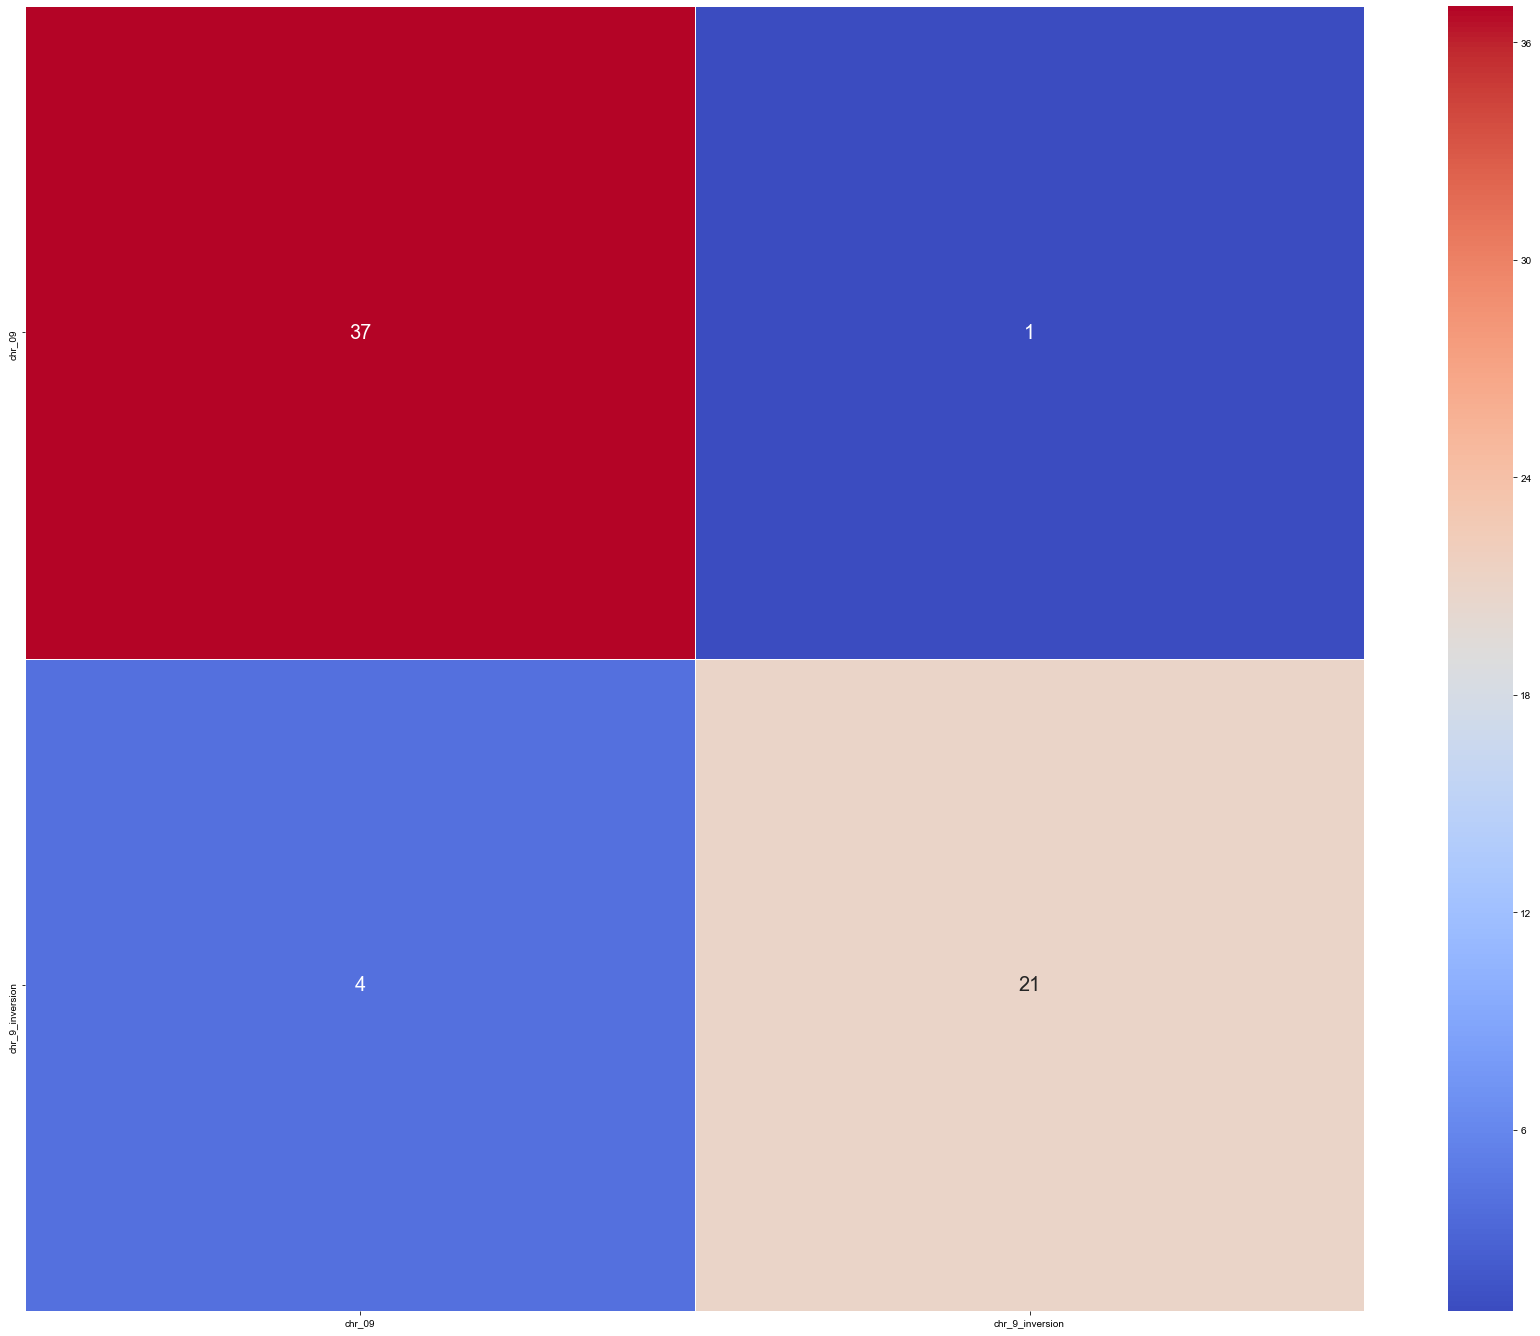

In [51]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [52]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [53]:
y_predict

array([[9.76126432e-01, 5.12033722e-08],
       [1.00000000e+00, 1.25864761e-11],
       [1.47422515e-02, 9.67322732e-04],
       [9.99999166e-01, 1.73908429e-10],
       [9.99617577e-01, 1.69427210e-07],
       [9.99533892e-01, 1.04911912e-07],
       [9.96803999e-01, 6.89776769e-08],
       [9.99998212e-01, 2.25349872e-09],
       [9.99999881e-01, 3.55360151e-11],
       [9.99999881e-01, 7.80545628e-11],
       [9.99998212e-01, 1.19980914e-09],
       [9.99871731e-01, 1.38249590e-08],
       [9.99862552e-01, 8.82941578e-08],
       [9.99998093e-01, 1.92180760e-09],
       [9.99938488e-01, 8.13152568e-08],
       [9.99907255e-01, 7.47328812e-08],
       [9.99835491e-01, 7.46644844e-08],
       [9.99884248e-01, 5.24374286e-08],
       [9.66637611e-01, 2.91914466e-06],
       [1.00000000e+00, 1.19758552e-11],
       [9.99999404e-01, 8.81365869e-10],
       [9.99999404e-01, 2.75784284e-10],
       [9.99647021e-01, 4.62624339e-09],
       [9.98725593e-01, 4.28756863e-07],
       [1.000000

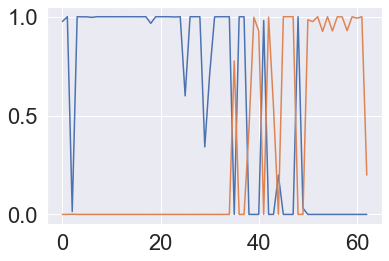

In [54]:
plt.plot(y_predict)

In [55]:
y_predict_1D = y_predict[:,0]

In [56]:
y_predict_1D_processed = 1- y_predict_1D

In [57]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [58]:
auc_rf

0.9642105263157894

In [59]:
x = y = np.arange(0,1.1,0.1)

In [60]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

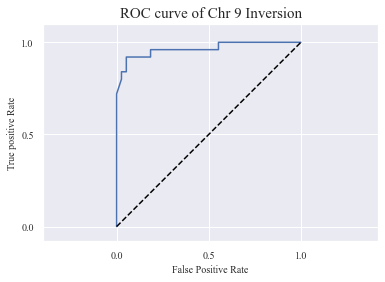

In [61]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [62]:
auc_value = auc(fpr, tpr)

In [63]:
print('AUC is ', auc_value)

AUC is  0.9642105263157894


# Results

In [64]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.921


In [65]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.90      0.97      0.94        38
chr_9_inversion       0.95      0.84      0.89        25

      micro avg       0.92      0.92      0.92        63
      macro avg       0.93      0.91      0.92        63
   weighted avg       0.92      0.92      0.92        63



In [66]:
type(performanceReport)

str

In [67]:
confusion

,chr_09,chr_9_inversion
chr_09,37,1
chr_9_inversion,4,21


In [68]:
print('AUC is ', auc_value)

AUC is  0.9642105263157894


## Export to a text file

In [69]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()